In [1]:
import h5py
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [2]:
file_predictions = 'predictions.txt'
train_file = 'MA0035_4_m5_train.h5'
test_file = 'MA0035_4_m5_test.h5'

In [3]:
h5_train = h5py.File(train_file, 'r')
h5_test = h5py.File(test_file, 'r')

In [4]:
train_data = h5_train['data']
train_binlabels = h5_train['binlabels']

print(train_data.shape)

val_data = train_data[-10000:]
val_binlabels = train_binlabels[-10000:]

train_data = train_data[:20000]
train_binlabels = train_binlabels[:20000]

(100000, 4, 1000)


In [8]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(4, 1000)),
        tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
    ]
)

In [9]:
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'binary_crossentropy',
    metrics=[tf.keras.metrics.AUC()]
)



In [11]:
history = model.fit(train_data, 
            train_binlabels,
            epochs=30, 
            validation_data=(val_data, val_binlabels))


Epoch 1/30
625/625 [==============================] - 2s 2ms/step - loss: 0.6353 - auc: 0.4977 - val_loss: 0.6189 - val_auc: 0.5087
Epoch 2/30
625/625 [==============================] - 1s 2ms/step - loss: 0.6102 - auc: 0.6092 - val_loss: 0.6308 - val_auc: 0.5092
Epoch 3/30
625/625 [==============================] - 1s 2ms/step - loss: 0.5882 - auc: 0.6552 - val_loss: 0.6342 - val_auc: 0.5089
Epoch 4/30
625/625 [==============================] - 1s 2ms/step - loss: 0.5681 - auc: 0.6965 - val_loss: 0.6487 - val_auc: 0.5103
Epoch 5/30
625/625 [==============================] - 1s 2ms/step - loss: 0.5559 - auc: 0.7188 - val_loss: 0.6569 - val_auc: 0.5116
Epoch 6/30
625/625 [==============================] - 1s 2ms/step - loss: 0.5324 - auc: 0.7429 - val_loss: 0.6858 - val_auc: 0.5108
Epoch 7/30
625/625 [==============================] - 1s 2ms/step - loss: 0.4865 - auc: 0.7949 - val_loss: 0.7202 - val_auc: 0.5079
Epoch 8/30
625/625 [==============================] - 1s 2ms/step - loss: 0.

In [14]:
test_data = h5_test['data'][:]
test_binlabels = h5_test['binlabels'][:]

In [15]:
acc, auc = model.evaluate(test_data, test_binlabels)

313/313 [==============================] - 0s 1ms/step - loss: 2.8469 - auc: 0.4994


In [16]:
yhat = model.predict(test_data)

In [21]:
fpr, tpr, _ = roc_curve(test_binlabels, yhat)

In [22]:
roc_auc = roc_auc_score(test_binlabels, yhat)

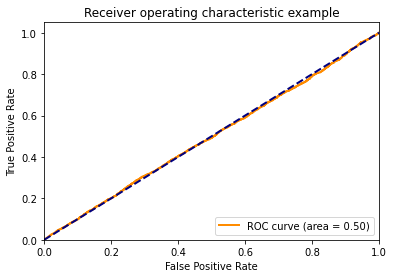

In [23]:
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()